In [1]:
##################################################
# Model in Thesis Notebook#######################
#################################################

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


from ineq import Theil


from preprocessing import complete_vars
from preprocessing import ratios
from preprocessing import breakdown_vars
from preprocessing import dummies_ohe
from preprocessing import Xy
from preprocessing import std_z
from imblearn.under_sampling import RandomUnderSampler

from LocalSearch import ModelArchitecture
from LocalSearch import assign_weights
from LocalSearch import SA_min
from LocalSearch import search

# Third libraries
import pandas as pd
from tensorflow.keras import Sequential
import tensorflow as tf
from NeuralNetwork import  MLP


from Experiment import hypersearch_GeneticNN
from Experiment import eval_model_NN   
from Experiment import mean_results_NN

from imblearn.under_sampling import RandomUnderSampler
from LocalSearch import SA_min
from LocalSearch import search
from NeuralNetwork import MLP
from LocalSearch import ModelArchitecture
from LocalSearch import assign_weights
from LocalSearch import SA_min
from LocalSearch import search

# Third libraries
import pandas as pd
from tensorflow.keras import Sequential
import tensorflow as tf
from NeuralNetwork import  MLP
import itertools
from Experiment import hypersearch_GeneticNN
from Experiment import eval_model_NN   
from Experiment import mean_results_NN



In [3]:
df_train = pd.read_csv("Datapooled.csv")

VARS = ['Ganancia bruta', 'Ganancia (pérdida)','Ingresos de actividades ordinarias' , 'Costo de ventas', 'Patrimonio total',
     'Total pasivos', 'Total de activos', 'Ganancias acumuladas',  'Pasivos corrientes totales',  'Activos corrientes totales']

df_train.rename(columns={'Clasificación Industrial Internacional Uniforme Versión 4 A.C':'Sector'}, inplace=True)

df_train = df_train[VARS+[ 'event', 'Sector']]
print(df_train[df_train['event']==1].info())
df_train['complete-vars'] = complete_vars(df_train) #1 is that have all variables!
df_train =  df_train[df_train['complete-vars']==1] #filtering firms that have not financial information 
print(df_train[df_train['event']==1].info())
df_train = ratios(df_train)
predictors =[ 'GPM', 'NPM', 'ROE','ROA', 'IR', 'DER', 'RSL', 'CR', 'Ax1', 'Ax2', 'Sector']
print(df_train[df_train['event']==1].info())
df_train.replace([np.inf,-np.inf], np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train.drop(columns=['complete-vars'], inplace=True)
df_train = df_train[predictors + ['event']].copy()
df_exp = df_train.copy()

X, y = Xy(df_train, 'event')
cat, nonormal, normal  = breakdown_vars(X)
nums = nonormal + normal
X = dummies_ohe(X, cat) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 666, stratify=y)
rus = RandomUnderSampler(random_state=123)
X_train, y_train = rus.fit_resample(X_train, y_train)
X_train = std_z(nums, X_train)
X_test = std_z(nums = nums, df_ = X_test)

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 4 to 26499
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ganancia bruta                      353 non-null    float64
 1   Ganancia (pérdida)                  353 non-null    float64
 2   Ingresos de actividades ordinarias  353 non-null    float64
 3   Costo de ventas                     330 non-null    float64
 4   Patrimonio total                    353 non-null    float64
 5   Total pasivos                       353 non-null    float64
 6   Total de activos                    353 non-null    float64
 7   Ganancias acumuladas                351 non-null    float64
 8   Pasivos corrientes totales          352 non-null    float64
 9   Activos corrientes totales          353 non-null    float64
 10  event                               771 non-null    float64
 11  Sector                              771 non-null

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [4]:
vars = ['ROE', 'ROA',
         'IR', 'RSL', 
         'Sector_D', 'Sector_E', 
         'Sector_G','Sector_J', 
         'Sector_K', 'Sector_L', 
         'Sector_M', 'Sector_O', 
         'Sector_Q','Sector_R']


In [5]:
X_train, X_test = X_train.loc[:, vars],  X_test.loc[:, vars]

In [6]:
## Poner mi algoritmo a competir con una red neuronal para maximizar el F1
## y también tomar todas las métricas que hagan falta claramente...
architecture = (5,5,1)
Pop_sizes  = [75] #75  
generations = [150]
Mutations = [0.07, 0.09]
Tournaments = [5]
Cross = [0.75, 0.85] 
probs_mate = [0.5]  
probs_mutate = [0.04 , 0.06]

regist = hypersearch_GeneticNN(X_train = X_train, y_train=y_train,
                      architecture= architecture,
                      pop_sizes=Pop_sizes,
                      generations=generations,
                      tournaments_sizes=Tournaments,
                      mutations=Mutations,
                      crossovers = Cross,
                      mate_indpb =probs_mate,
                      mutate_indpb = probs_mutate,
                      limit_unchanged =100)

Verbose: (75, 150, 5, 0.07, 0.75, 0.5, 0.04)
---------------
Generation:  1
---------------
Fitest : 0.8683645899338319 Inequality:  0.04647372193883741 Generation without improvement:  0
Stats mean:  4.0936613218082 std:  2.9037429891856195 min: 0.8683645899338319 max:  15.783691663580848
0.8683645899338319 0.04647372193883741 0 (4.0936613218082, 2.9037429891856195, 0.8683645899338319, 15.783691663580848)
---------------
Generation:  2
---------------
Fitest : 0.755381764168924 Inequality:  0.05006633958766196 Generation without improvement:  0
Stats mean:  4.466808274214814 std:  3.1200943929919296 min: 0.755381764168924 max:  15.161992418501352
0.755381764168924 0.05006633958766196 0 (4.466808274214814, 3.1200943929919296, 0.755381764168924, 15.161992418501352)
---------------
Generation:  3
---------------
Fitest : 0.7575766636688179 Inequality:  0.06597289789096716 Generation without improvement:  0
Stats mean:  4.2720822626621695 std:  3.472458196065814 min: 0.7575766636688179 ma

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


---------------
Generation:  1
---------------
Fitest : 0.8683645899338319 Inequality:  0.04626430854591578 Generation without improvement:  0
Stats mean:  4.10807074685821 std:  2.91120150206471 min: 0.8683645899338319 max:  15.783691663580848
0.8683645899338319 0.04626430854591578 0 (4.10807074685821, 2.91120150206471, 0.8683645899338319, 15.783691663580848)
---------------
Generation:  2
---------------
Fitest : 0.8683645899338319 Inequality:  0.05463904534950374 Generation without improvement:  0
Stats mean:  3.9842946406975686 std:  2.976887726163347 min: 0.8683645899338319 max:  14.383948406624222
0.8683645899338319 0.05463904534950374 0 (3.9842946406975686, 2.976887726163347, 0.8683645899338319, 14.383948406624222)
---------------
Generation:  3
---------------
Fitest : 0.8683645899338319 Inequality:  0.051745081603701275 Generation without improvement:  1
Stats mean:  2.636714764847958 std:  1.9008548965251455 min: 0.8683645899338319 max:  8.753406546472453
0.8683645899338319 0

c:\Users\sjrp2\Desktop\Thesis-puj\Final Notebooks\NeuralNetwork.py:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


---------------
Generation:  91
---------------
Fitest : 0.6041850589143835 Inequality:  0.0426974230382909 Generation without improvement:  17
Stats mean:  0.7146136214131124 std:  0.6700316893119619 min: 0.6041850589143835 max:  6.104628145712332
0.6041850589143835 0.0426974230382909 17 (0.7146136214131124, 0.6700316893119619, 0.6041850589143835, 6.104628145712332)
---------------
Generation:  92
---------------
Fitest : 0.6041850589143835 Inequality:  0.03198459409968524 Generation without improvement:  18
Stats mean:  0.6698239530812452 std:  0.5585044483518833 min: 0.6041850589143835 max:  5.474134345320393
0.6041850589143835 0.03198459409968524 18 (0.6698239530812452, 0.5585044483518833, 0.6041850589143835, 5.474134345320393)
---------------
Generation:  93
---------------
Fitest : 0.6011962716062444 Inequality:  9.701443129074461e-06 Generation without improvement:  19
Stats mean:  0.605430633244974 std:  0.005577383360106862 min: 0.6011962716062444 max:  0.6362498459062601
0.60

In [7]:
from gentools import select_optimun_parameters
from sklearn.metrics import f1_score
parameters_ = select_optimun_parameters(regist=regist,
                           architecture=architecture,
                             k_folds=10, 
                             X_train=X_train, 
                             y_train=y_train,
                             assessment_metric = f1_score)

From here is the fittest (75, 150, 5, 0.07, 0.75, 0.5, 0.04)
(0.7525490196078432, 0.0018000000000000238)


In [8]:
from GeneticNeuralNetwork import gaMLP_Entropy
fittest_individual, history, stats = gaMLP_Entropy(
                    architecture= architecture,
                    population_size=parameters_[0],
                    max_generations= parameters_[1],
                    tournament_size=parameters_[2],
                    MUTPB=parameters_[3],
                    CXPB=parameters_[4], 
                    mate_indpb= parameters_[5],
                    mutate_indpb=parameters_[6],
                    ineq_measure=Theil,
                    ineq_min  = 0,
                    limit_unchanged=100,
                    X_train = X_train, 
                    y_train = y_train,
                    verbose=True)

from sklearn.metrics import classification_report
preds_GA = np.where(MLP(architecture=architecture, X_train=X_test, y_train=y_test, initial_solution=fittest_individual, preds=True)>0.5,1,0)
GA  = pd.DataFrame(classification_report(y_test, preds_GA, output_dict=True)).iloc[:,0:2]
GA

c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sjrp2\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


---------------
Generation:  1
---------------
Fitest : 0.7074582797219224 Inequality:  0.057790938044246475 Generation without improvement:  0
Stats mean:  4.818396791934192 std:  3.604433668958351 min: 0.7074582797219224 max:  15.19252732880513
0.7074582797219224 0.057790938044246475 0 (4.818396791934192, 3.604433668958351, 0.7074582797219224, 15.19252732880513)
---------------
Generation:  2
---------------
Fitest : 0.7071321038114347 Inequality:  0.048988864841096415 Generation without improvement:  1
Stats mean:  3.3670784966441913 std:  2.2257879504478875 min: 0.7071321038114347 max:  9.613845973942556
0.7071321038114347 0.048988864841096415 1 (3.3670784966441913, 2.2257879504478875, 0.7071321038114347, 9.613845973942556)
---------------
Generation:  3
---------------
Fitest : 0.7071321038114347 Inequality:  0.0811459616647698 Generation without improvement:  2
Stats mean:  2.3606566002695963 std:  2.2694031737821323 min: 0.7071321038114347 max:  13.25595328763676
0.7071321038114

c:\Users\sjrp2\Desktop\Thesis-puj\Final Notebooks\NeuralNetwork.py:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


---------------
Generation:  137
---------------
Fitest : 0.5414379419974644 Inequality:  0.0011301328613327415 Generation without improvement:  32
Stats mean:  0.5524289906303395 std:  0.05951349815461091 min: 0.5414379419974644 max:  0.9215477488472441
0.5414379419974644 0.0011301328613327415 32 (0.5524289906303395, 0.05951349815461091, 0.5414379419974644, 0.9215477488472441)
---------------
Generation:  138
---------------
Fitest : 0.5414379419974644 Inequality:  1.6290322917259354e-05 Generation without improvement:  33
Stats mean:  0.5424958231879244 std:  0.006527528763950577 min: 0.5414379419974644 max:  0.595792663775178
0.5414379419974644 1.6290322917259354e-05 33 (0.5424958231879244, 0.006527528763950577, 0.5414379419974644, 0.595792663775178)
---------------
Generation:  139
---------------
Fitest : 0.541185149651724 Inequality:  3.1923000946185966e-05 Generation without improvement:  34
Stats mean:  0.542652013894898 std:  0.009212225569686266 min: 0.541185149651724 max:  0

,0.0,1.0
precision,1.000000,0.026689
recall,0.291869,1.000000
f1-score,0.451855,0.051990
support,3296.000000,64.000000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


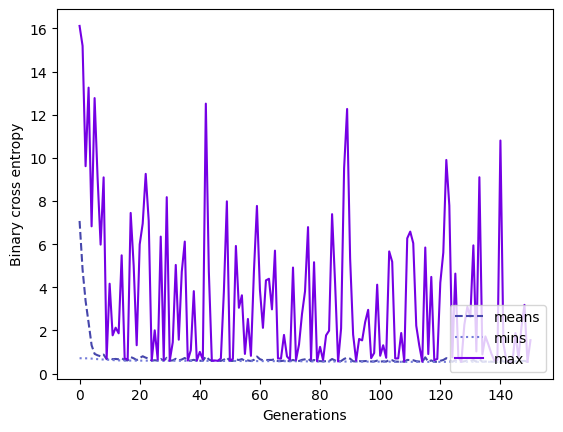

In [9]:
from gentools import plot_stats
plot_stats(stats,Title = 'Binary cross entropy', path='Convergence-binary.eps')

In [10]:
SA_sol  =  SA_min(solution = fittest_individual, search=search,
         fitnessFunction = lambda x: MLP(architecture = architecture,
                        X_train = X_train,
                          y_train = y_train, 
                          initial_solution = x),
         Tf = 0,
         cooling_rate  = 35,
         max_iterations = 150,
         beta = 0.001,
         alpha = 0.07,
         seed_random=123,
         reduce_temp=0.000001,)

1
(0.5340431596910261,) Temperature : 0.0005392913500433722
2
(0.5346121221140453,) Temperature : 0.0005382913500433722
3
(0.5332798192334379,) Temperature : 0.0005372913500433722
4
(0.5332913763045954,) Temperature : 0.0005362913500433722
5
(0.5328842524535244,) Temperature : 0.0005352913500433721
6
(0.5324355968265312,) Temperature : 0.0005342913500433721
7
(0.531502882176592,) Temperature : 0.0005332913500433721
8
(0.5332475893494324,) Temperature : 0.0005322913500433721
9
(0.5322082117128304,) Temperature : 0.000531291350043372
10
(0.5315851316154759,) Temperature : 0.000530291350043372
11
(0.5313039661441173,) Temperature : 0.000529291350043372
12
(0.5333048371001574,) Temperature : 0.000528291350043372
13
(0.5306089583581342,) Temperature : 0.0005272913500433719
14
(0.5312739741225683,) Temperature : 0.0005262913500433719
15
(0.5286711508204269,) Temperature : 0.0005252913500433719
16
(0.5296602507879127,) Temperature : 0.0005242913500433719
17
(0.5306028514029636,) Temperature :

In [11]:
preds_SA = np.where(MLP(architecture=architecture, X_train=X_test, y_train=y_test, initial_solution=SA_sol['minor'][1], preds=True)>0.5,1,0)
SA  = pd.DataFrame(classification_report(y_test, preds_SA, output_dict=True)).iloc[:,0:2]
SA

c:\Users\sjrp2\Desktop\Thesis-puj\Final Notebooks\NeuralNetwork.py:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


,0.0,1.0
precision,0.998235,0.036747
recall,0.514867,0.953125
f1-score,0.679343,0.070766
support,3296.000000,64.000000


In [17]:
models_tab = pd.concat([GA, SA,], axis=1)
cols_names =  pd.MultiIndex.from_tuples([('Genetic training','No-Default'),("Genetic training",'Deafult'),
              ("Genetic annealing",'No-Default'),('Genetic annealing','Default'),
              ])
models_tab.columns  = cols_names
models_tab = models_tab.style.set_table_styles([
   {'selector': 'th','props': [('text-align', 'center')]}]).format(precision=2)
models_tab.to_latex("Resutlts-models-binary.tex")
models_tab

In [13]:
X_train.index

Index([11250, 14336,  9571,  3175,  8136,  3385,   822, 12247,  3985, 13209,
       ...
        4788,  4985,  2971,  6943,  9109,  1157,  3242,  9792,  9255,   987],
      dtype='int64', length=508)

In [14]:
y_test.index

Index([19146,  3820, 10870, 17643, 18621,  9242, 13245, 20033,   952,  4099,
       ...
        1161, 19710,  9821, 15427,  8818, 10170,  8837,  3652, 19586, 13580],
      dtype='int64', length=3360)

In [15]:
MLP(architecture=architecture, X_train=X_test, y_train=y_test, initial_solution=fittest_individual, score=f1_score)

c:\Users\sjrp2\Desktop\Thesis-puj\Final Notebooks\NeuralNetwork.py:74: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


(0.05199025182778229,)

In [16]:
####################################
# Epochs determination in NN...
errors_mean  = []
model = Sequential()
model  = ModelArchitecture(model, architecture, X_train)
model.compile(optimizer="SGD",
              loss='binary_crossentropy',
              metrics=['accuracy'])
EPOCHS  = [100, 350, 500, 700, 1200]
for epoch in EPOCHS:
  results = eval_model_NN(classifier  = model,
              X_train_ =  X_train,
              y_train_  = y_train,
              epochs =epoch,
              k_folds= 5)
  errors_mean.append(mean_results_NN(results, 'f1'))
  Optimun_epochs  = EPOCHS[np.array(errors_mean).argmax()]




Epoch 1/100


13/13 [==============================] - 2s 3ms/step - loss: 0.7176 - accuracy: 0.5000
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7135 - accuracy: 0.5000
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7101 - accuracy: 0.5000
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.5000
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.5000
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.5000
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5000
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch

KeyboardInterrupt: 

In [ ]:
model = Sequential()
model  = ModelArchitecture(model, architecture, X_train)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=Optimun_epochs,  verbose=0)
preds_backprop = np.where(model.predict(X_test)>0.5,1,0)
Backprop  = pd.DataFrame(classification_report(y_test, preds_backprop, output_dict=True)).iloc[:,0:2]


105/105 [==============================] - 0s 1ms/step


In [ ]:
model = Sequential()
model  = ModelArchitecture(model, architecture, X_train)
print(model.summary())
model = assign_weights(model, architecture, X_train, fittest_individual) ## Pass from 
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=Optimun_epochs,  verbose=0)
preds_GAbackprop = np.where(model.predict(X_test)>0.5 ,1 ,0)
GABackprop  = pd.DataFrame(classification_report(y_test, preds_GAbackprop
                                                , output_dict=True)).iloc[:,0:2]
GABackprop

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 75        
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 111 (444.00 Byte)
Trainable params: 111 (444.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
105/105 [==============================] - 0s 1ms/step


,0.0,1.0
precision,0.992181,0.043478
recall,0.692961,0.718750
f1-score,0.816006,0.081996
support,3296.000000,64.000000
